In [1]:
import earthkit.data
import earthkit.plots

from earthkit.plots.styles.symbols import HURRICANE
import cartopy.crs as ccrs

In [2]:
track = earthkit.data.from_source("file", "sandy.csv").to_xarray()
mslp = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/metview/gallery/sandy_mslp.grib",
)

In [3]:
track

<xarray.Dataset>
Dimensions:  (index: 11)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    date     (index) int64 20121027 20121027 20121028 ... 20121031 20121101
    time     (index) int64 0 12 0 12 0 12 0 12 0 12 0
    lon      (index) float64 -76.9 -76.29 -74.64 -73.07 ... -80.37 -76.11 -76.37
    lat      (index) float64 27.1 28.37 30.2 31.77 ... 39.83 41.87 45.1 46.52

In [11]:
style = earthkit.plots.styles.Contour(
    levels=range(900, 1100, 5),
    units="hPa",
    labels=True,
    line_colors="black",
)

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'line_colors', 'labels', 'label_fontsize', 'trasnform_first'
  result = super().contour(*args, **kwargs)


[datetime.datetime(2012, 10, 27, 0, 0)] [27.1] FOOBARBAZ


/Users/mavj/earthkit-plots-3/earthkit/plots/metadata/labels.py:91: UserWarning: No key "variable_name" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')


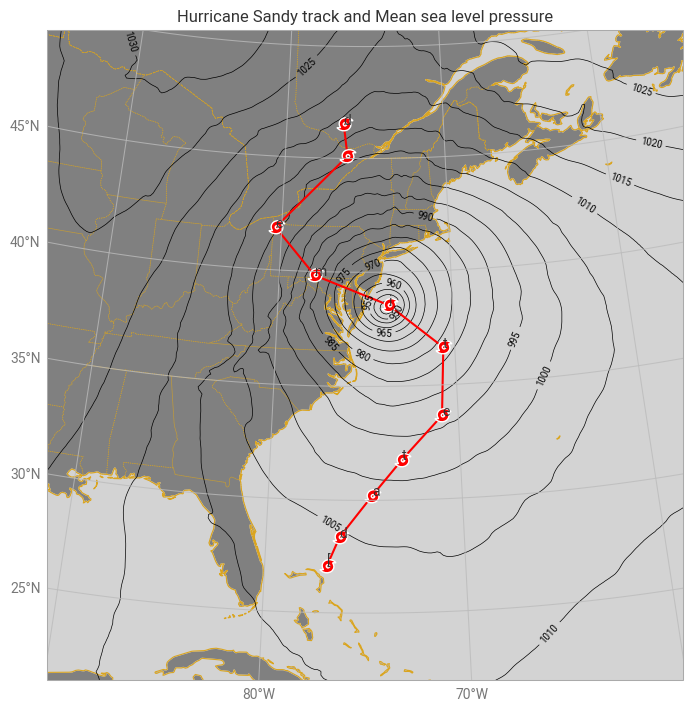

In [12]:
chart = earthkit.plots.Map(domain=[-90, -60, 22, 50])


chart.contour(mslp, style=style)
chart.line(track, x="lon", y="lat", color="red", marker=HURRICANE, ms=12, mec="white", mfc="red")

chart.labels(track, x="lon", y="lat", label="{date.parse_time} {lat}")

chart.ocean(color="lightgrey")
chart.land(color="grey")
chart.coastlines(color="goldenrod")
chart.borders(color="goldenrod")
chart.administrative_areas(color="goldenrod")
chart.gridlines()

chart.title("Hurricane Sandy track and {variable_name!0}")

chart.show()